<a href="https://colab.research.google.com/github/Adeola23/Hamoye/blob/master/Stage_E_quiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/My Drive/household_power_consumption.txt', sep=';', low_memory=False, infer_datetime_format=True, parse_dates={'datetime':[0,1]})
df.head()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   datetime               datetime64[ns]
 1   Global_active_power    object        
 2   Global_reactive_power  object        
 3   Voltage                object        
 4   Global_intensity       object        
 5   Sub_metering_1         object        
 6   Sub_metering_2         object        
 7   Sub_metering_3         float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 126.7+ MB


In [5]:
df.set_index('datetime', inplace=True)
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.430,4.000,0.000,0.000,0.0
2010-11-26 20:59:00,0.944,0.000,240.000,4.000,0.000,0.000,0.0
2010-11-26 21:00:00,0.938,0.000,239.820,3.800,0.000,0.000,0.0


In [6]:
df.isnull().sum()

Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [7]:
null_num = 0
for values in df.values.tolist():
    for value in values:
        if value == '?':
            null_num += 1
        else:
            continue

print('Total no of null values are: ', null_num)

Total no of null values are:  155874


In [8]:
df.replace('?', np.nan, inplace=True) 

In [9]:
df.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [10]:
df.select_dtypes(include=['object']).columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2'],
      dtype='object')

In [11]:
for column in df.select_dtypes(include=['object']).columns:
        df[column] = df[column].astype('float')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [13]:
df = df.fillna({'Global_active_power':df['Global_active_power'].mean(), 'Global_reactive_power':df['Global_reactive_power'].mean(),
           'Voltage':df['Voltage'].mean(), 'Global_intensity':df['Global_intensity'].mean(),
           'Sub_metering_1':df['Sub_metering_1'].mean(), 'Sub_metering_2':df['Sub_metering_2'].mean(),
           'Sub_metering_3':df['Sub_metering_3'].mean()})

In [14]:
new_df = df.copy()

In [15]:
new_df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

##Using the 'Global_active_power' column

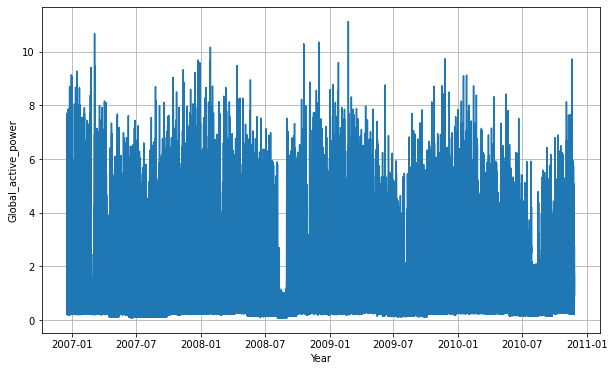

In [16]:
plt.figure(figsize=(10,6))
plt.plot(new_df.index, new_df['Global_active_power'], '-')
plt.grid()
plt.xlabel('Year')
plt.ylabel('Global_active_power')
plt.show()

###Downsampling the data to daily timeframe

In [36]:
daily_df = new_df.resample('D').sum()

In [37]:
daily_df.isnull().values.sum()

0

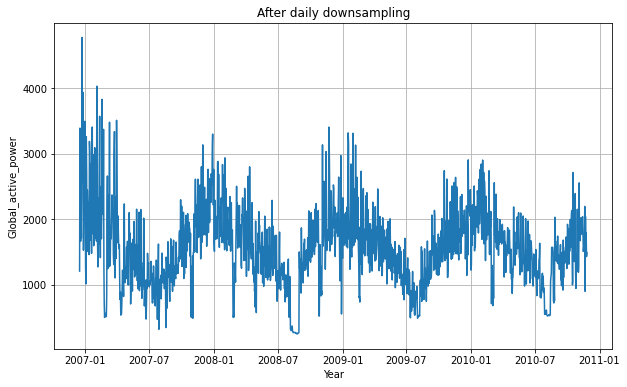

In [38]:
plt.figure(figsize=(10,6))
plt.plot(daily_df.index, daily_df['Global_active_power'], '-')
plt.grid()
plt.title('After daily downsampling')
plt.xlabel('Year')
plt.ylabel('Global_active_power')
plt.show()

In [20]:
print('no of observations after daily downsampling is {}'.format(len(new_df_daily)))

no of observations after daily downsampling is 1442


In [24]:
global_a = new_df_daily['Global_active_power']
global_r= new_df_daily['Global_reactive_power']

In [25]:
from scipy.stats import pearsonr
corr, _ = pearsonr(global_a, global_r)
print('Pearsons correlation: %.2f' % corr)

Pearsons correlation: 0.04


In [26]:
global_a_p = new_df['Global_active_power']
global_r_p = new_df['Global_reactive_power']

In [27]:
corr, _ = pearsonr(global_a_p, global_r_p)
print('Pearsons correlation: %.2f' % corr)

Pearsons correlation: 0.25


In [28]:
voltage = new_df_daily['Voltage']
global_i = new_df_daily['Global_intensity']

In [29]:
corr, _ = pearsonr(voltage, global_i)
print('Pearsons correlation: %.2f' % corr)

Pearsons correlation: 0.05


In [30]:
voltage_d = df['Voltage']
global_I = df['Global_intensity']

In [31]:
corr, _ = pearsonr(voltage_d, global_I)
print('Pearsons correlation: %.2f' % corr)

Pearsons correlation: -0.41


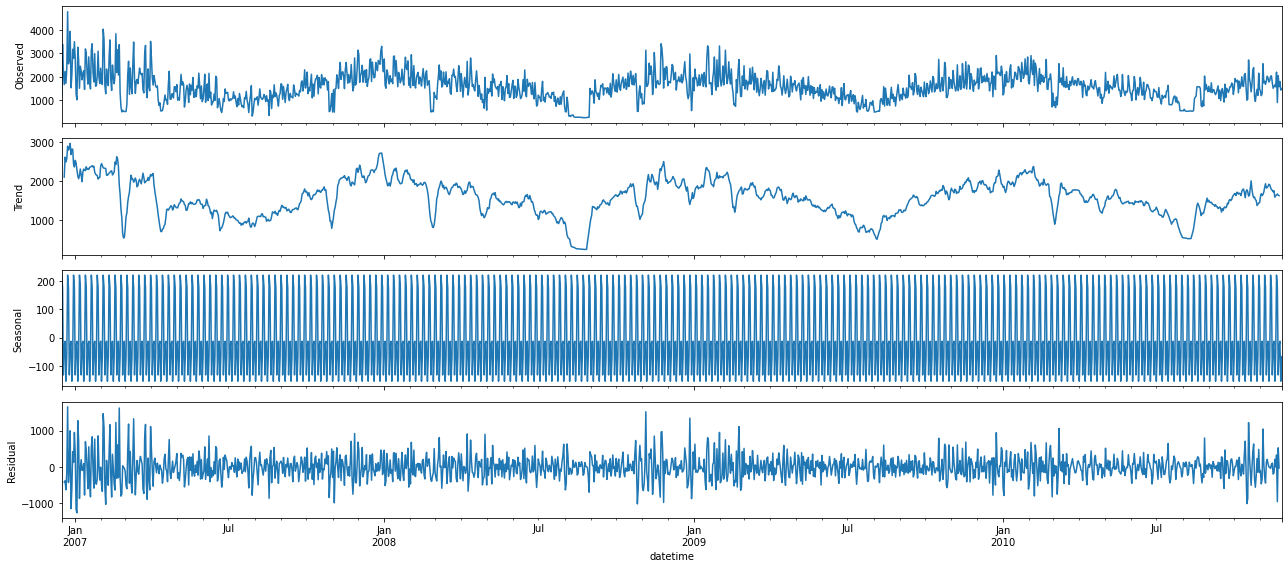

In [35]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
data_daily = sm.tsa.seasonal_decompose(new_df_daily['Global_active_power'], model='additive')
data_daily.plot()
plt.show()

In [ ]:

from statsmodels.tsa.stattools import adfuller 
adf_result = adfuller(new_df_daily['Global_active_power'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p_value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used: {adf_result[3]}')
print(f'Critical_values:')
for k, v in adf_result[4].items():
  print(f'  {k} : {v}')

ADF Statistic: -3.7317038452674414
p_value: 0.003688677846598547
No. of lags used: 22
No. of observations used: 1419
Critical_values:
  1% : -3.434966750462565
  5% : -2.8635789736973725
  10% : -2.5678555388041384


In [39]:
daily_df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [40]:
new_daily_df = daily_df.reset_index()
new_daily_df.head()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2,2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
3,2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
4,2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [41]:

new_daily_df = new_daily_df[['datetime', 'Global_active_power']]
new_daily_df = new_daily_df.rename(columns={'datetime':'ds', 'Global_active_power':'y'})
print(new_daily_df.shape)
new_daily_df.head()

(1442, 2)


,ds,y
0,2006-12-16,1209.176
1,2006-12-17,3390.460
2,2006-12-18,2203.826
3,2006-12-19,1666.194
4,2006-12-20,2225.748


In [69]:
test = new_daily_df[-365:]
print(test.shape)
data.head()

(365, 2)


,ds,y
1077,2009-11-27,1380.026
1078,2009-11-28,1858.950
1079,2009-11-29,1650.962
1080,2009-11-30,1745.190
1081,2009-12-01,1756.378


In [70]:
train = new_daily_df[:-365]
print(train.shape)
train.head()

(1077, 2)


,ds,y
0,2006-12-16,1209.176
1,2006-12-17,3390.460
2,2006-12-18,2203.826
3,2006-12-19,1666.194
4,2006-12-20,2225.748


In [71]:
assert len(train) == (len(new_daily_df)-365)

In [72]:
from fbprophet import Prophet
model = Prophet()
model.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [47]:
future = model.make_future_dataframe(periods=365, freq='D') 
forecast = model.predict(future) 
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2006-12-16,1651.870476,1872.964833,2979.586088,1651.870476,1651.870476,775.803954,775.803954,775.803954,245.727868,245.727868,245.727868,530.076086,530.076086,530.076086,0.0,0.0,0.0,2427.674430
1,2006-12-17,1651.695654,1886.330749,2989.969122,1651.695654,1651.695654,772.611682,772.611682,772.611682,228.437514,228.437514,228.437514,544.174167,544.174167,544.174167,0.0,0.0,0.0,2424.307336
2,2006-12-18,1651.520833,1485.820433,2627.577242,1651.520833,1651.520833,397.879289,397.879289,397.879289,-161.218418,-161.218418,-161.218418,559.097707,559.097707,559.097707,0.0,0.0,0.0,2049.400122
3,2006-12-19,1651.346012,1677.176336,2757.881224,1651.346012,1651.346012,545.082036,545.082036,545.082036,-29.322660,-29.322660,-29.322660,574.404696,574.404696,574.404696,0.0,0.0,0.0,2196.428047
4,2006-12-20,1651.171190,1650.886213,2767.764219,1651.171190,1651.171190,564.928312,564.928312,564.928312,-24.708936,-24.708936,-24.708936,589.637248,589.637248,589.637248,0.0,0.0,0.0,2216.099502


In [48]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2006-12-16,2427.674430,1872.964833,2979.586088,1651.870476,1651.870476,1651.870476
1,2006-12-17,2424.307336,1886.330749,2989.969122,1651.695654,1651.695654,1651.695654
2,2006-12-18,2049.400122,1485.820433,2627.577242,1651.520833,1651.520833,1651.520833
3,2006-12-19,2196.428047,1677.176336,2757.881224,1651.346012,1651.346012,1651.346012
4,2006-12-20,2216.099502,1650.886213,2767.764219,1651.171190,1651.171190,1651.171190
...,...,...,...,...,...,...,...
1437,2010-11-22,2040.151795,1489.454360,2632.366567,1632.211137,1619.933222,1644.590271
1438,2010-11-23,2182.312497,1633.781107,2716.688432,1632.346982,1619.983795,1644.760269
1439,2010-11-24,2193.411479,1652.439825,2749.424500,1632.482827,1620.034368,1644.930267
1440,2010-11-25,2026.197054,1467.593546,2608.604269,1632.618672,1620.084942,1645.100266


In [49]:
def mape(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [51]:
test_val = data['y'] 
pred_val = forecast['yhat'][-365:] 

In [52]:
prediction = mape(test_val, pred_val)
print('MAPE prediction: ', round(prediction, 2)) 

MAPE prediction:  20.9


In [53]:
from sklearn.metrics import mean_squared_error
pred_mse = mean_squared_error(test_val, pred_val)
pred_rmse = np.sqrt(pred_mse)
print('RMSE prediction: ', round(pred_rmse, 2))

RMSE prediction:  375.04


In [54]:
def rmse(y_true, y_pred):
   y_true, y_pred = np.array(y_true), np.array(y_pred)
   return np.sqrt(np.mean(np.square(y_true-y_pred)))

In [55]:
new_pred_rmse = rmse(test_val, pred_val)
round(new_pred_rmse, 2) 

375.04

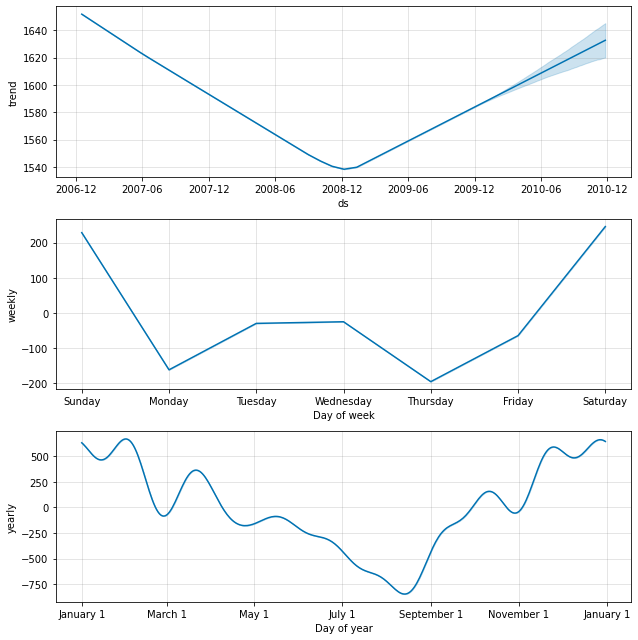

In [56]:
model.plot_components(forecast)
plt.show()

In [58]:
new_df_daily2 = new_df_daily.reset_index()
new_df_daily2.head()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2,2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
3,2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
4,2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [62]:
new_df_daily2 = new_df_daily2.rename(columns={'datetime':'ds', 'Global_active_power':'y', 'Global_reactive_power':'add1', 'Voltage':'add2', 'Global_intensity':'add3', 'Sub_metering_1':'add4', 'Sub_metering_2':'add5', 'Sub_metering_3':'add6'})
print(new_df_daily2.shape)
new_df_daily2.head()

(1442, 8)


,ds,y,add1,add2,add3,add4,add5,add6
0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2,2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
3,2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
4,2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [65]:
test2 = new_df_daily2[-365:]
print(test2.shape)
test2.head()

(365, 8)


,ds,y,add1,add2,add3,add4,add5,add6
1077,2009-11-27,1380.026,133.052,348276.70,5704.0,0.0,396.0,11599.0
1078,2009-11-28,1858.950,225.218,347898.89,7784.8,3199.0,386.0,14350.0
1079,2009-11-29,1650.962,191.056,350364.56,6878.4,1073.0,3061.0,7828.0
1080,2009-11-30,1745.190,153.382,351020.60,7232.2,1080.0,361.0,12039.0
1081,2009-12-01,1756.378,141.874,349391.74,7312.8,0.0,354.0,10821.0


In [67]:
train2 = new_df_daily2[:-365]
print(train2.shape)
train2.head()

(1077, 8)


,ds,y,add1,add2,add3,add4,add5,add6
0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2,2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
3,2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
4,2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [73]:
assert len(train2) == (len(new_df_daily)-365)

In [74]:
model2 = Prophet()

In [75]:
model2.add_regressor('add1')
model2.add_regressor('add2')
model2.add_regressor('add3')
model2.add_regressor('add4')
model2.add_regressor('add5')
model2.add_regressor('add6')
model2.fit(train2)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [77]:
future2 = model2.make_future_dataframe(periods=365, freq='D') 
future2

,ds
0,2006-12-16
1,2006-12-17
2,2006-12-18
3,2006-12-19
4,2006-12-20
...,...
1437,2010-11-22
1438,2010-11-23
1439,2010-11-24
1440,2010-11-25


In [79]:
future2['add1'] = new_df_daily2['add1']
future2['add2'] = new_df_daily2['add2']
future2['add3'] = new_df_daily2['add3']
future2['add4'] = new_df_daily2['add4']
future2['add5'] = new_df_daily2['add5']
future2['add6'] = new_df_daily2['add6']

In [80]:
forecast2 = model2.predict(future2) 
forecast2.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,add2,add2_lower,add2_upper,add3,add3_lower,add3_upper,add4,add4_lower,add4_upper,add5,add5_lower,add5_upper,add6,add6_lower,add6_upper,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2006-12-16,1566.208205,1158.462956,1190.329597,1566.208205,1566.208205,25.033001,25.033001,25.033001,-72.763302,-72.763302,-72.763302,-356.972861,-356.972861,-356.972861,2.196835,2.196835,2.196835,0.742868,0.742868,0.742868,-5.557483,-5.557483,-5.557483,-391.553789,-391.553789,-391.553789,-407.320943,-407.320943,-407.320943,1.408596,1.408596,1.408596,14.358558,14.358558,14.358558,0.0,0.0,0.0,1174.654416
1,2006-12-17,1566.143627,3400.187286,3432.603263,1566.143627,1566.143627,-9.027243,-9.027243,-9.027243,-0.120897,-0.120897,-0.120897,1839.073287,1839.073287,1839.073287,-0.484864,-0.484864,-0.484864,-1.170809,-1.170809,-1.170809,6.319667,6.319667,6.319667,1849.806679,1849.806679,1849.806679,1834.589141,1834.589141,1834.589141,0.164156,0.164156,0.164156,15.053382,15.053382,15.053382,0.0,0.0,0.0,3415.950306
2,2006-12-18,1566.079050,2187.766827,2218.440796,1566.079050,1566.079050,2.418741,2.418741,2.418741,0.353928,0.353928,0.353928,611.805162,611.805162,611.805162,0.794648,0.794648,0.794648,-0.347734,-0.347734,-0.347734,7.275203,7.275203,7.275203,637.648383,637.648383,637.648383,622.299948,622.299948,622.299948,-0.338153,-0.338153,-0.338153,15.686588,15.686588,15.686588,0.0,0.0,0.0,2203.727433
3,2006-12-19,1566.014473,1662.572094,1694.776862,1566.014473,1566.014473,4.352727,4.352727,4.352727,0.672347,0.672347,0.672347,98.827383,98.827383,98.827383,1.090123,1.090123,1.090123,-2.965703,-2.965703,-2.965703,-3.763561,-3.763561,-3.763561,112.790843,112.790843,112.790843,98.213317,98.213317,98.213317,-1.669783,-1.669783,-1.669783,16.247309,16.247309,16.247309,0.0,0.0,0.0,1678.805316
4,2006-12-20,1565.949895,2209.737802,2239.964932,1565.949895,1565.949895,2.560270,2.560270,2.560270,0.800421,0.800421,0.800421,627.481336,627.481336,627.481336,2.196835,2.196835,2.196835,-0.361925,-0.361925,-0.361925,7.338717,7.338717,7.338717,657.843016,657.843016,657.843016,640.015654,640.015654,640.015654,1.101892,1.101892,1.101892,16.725469,16.725469,16.725469,0.0,0.0,0.0,2223.792911


In [81]:
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2006-12-16,1174.654416,1158.462956,1190.329597,1566.208205,1566.208205,1566.208205
1,2006-12-17,3415.950306,3400.187286,3432.603263,1566.143627,1566.143627,1566.143627
2,2006-12-18,2203.727433,2187.766827,2218.440796,1566.079050,1566.079050,1566.079050
3,2006-12-19,1678.805316,1662.572094,1694.776862,1566.014473,1566.014473,1566.014473
4,2006-12-20,2223.792911,2209.737802,2239.964932,1565.949895,1565.949895,1565.949895
...,...,...,...,...,...,...,...
1437,2010-11-22,2119.118426,1848.009402,2418.373112,1643.329613,1373.792449,1942.374614
1438,2010-11-23,1660.812690,1383.485278,1960.857960,1643.459900,1372.926630,1943.885327
1439,2010-11-24,1868.206808,1592.325724,2168.888699,1643.590188,1371.310258,1945.388441
1440,2010-11-25,1491.116158,1214.284098,1791.834877,1643.720475,1369.531215,1946.356576


In [82]:
test2_val = test2['y']
pred_val2 = forecast2['yhat'][-365:] 

In [83]:
prediction2 = mape(test2_val, pred_val2)
print('MAPE prediction: ', round(prediction2, 2)) 

MAPE prediction:  2.83


In [84]:
pred2_mse = mean_squared_error(test2_val, pred_val2)
pred2_rmse = np.sqrt(pred2_mse)
print('RMSE prediction: ', round(pred2_rmse, 2))

RMSE prediction:  41.93


In [85]:
new_pred_rmse2 = rmse(test2_val, pred_val2)
round(new_pred_rmse2, 2) 

41.93

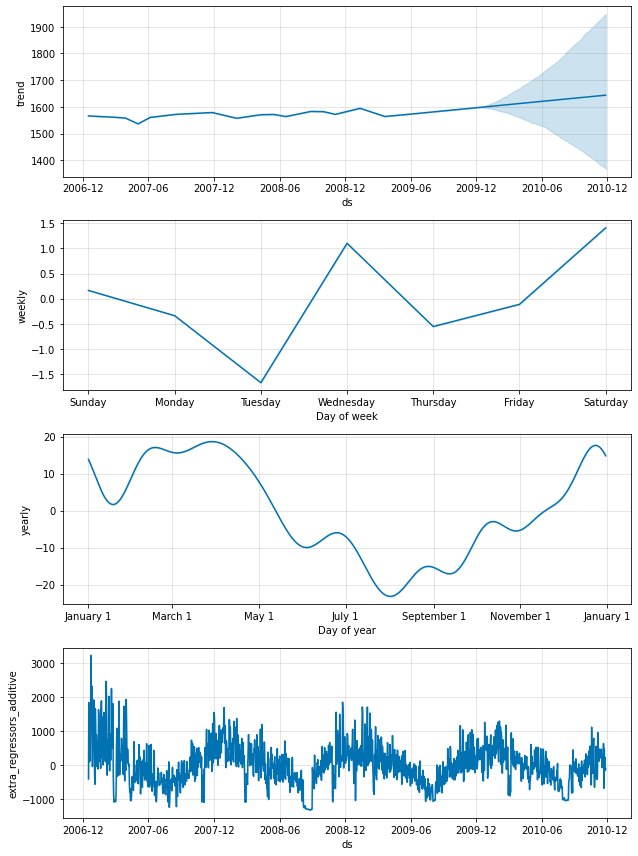

In [86]:
model2.plot_components(forecast2)
plt.show()